<a href="https://www.kaggle.com/code/shivamjd/house-rent-prediction-eda-and-modelling?scriptVersionId=103758481" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np 

import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

import datetime as dt

from sklearn import model_selection
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
# Importing File
df = pd.read_csv("../input/house-rent-prediction-dataset/House_Rent_Dataset.csv")
df.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [3]:
df['Posted On'] = pd.to_datetime(df['Posted On'])

In [4]:
df.dtypes

Posted On            datetime64[ns]
BHK                           int64
Rent                          int64
Size                          int64
Floor                        object
Area Type                    object
Area Locality                object
City                         object
Furnishing Status            object
Tenant Preferred             object
Bathroom                      int64
Point of Contact             object
dtype: object

In [5]:
# No missing values are found
df.isna().sum()

Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64

# EDA

Maximum rent 3500000


<Figure size 1440x360 with 0 Axes>

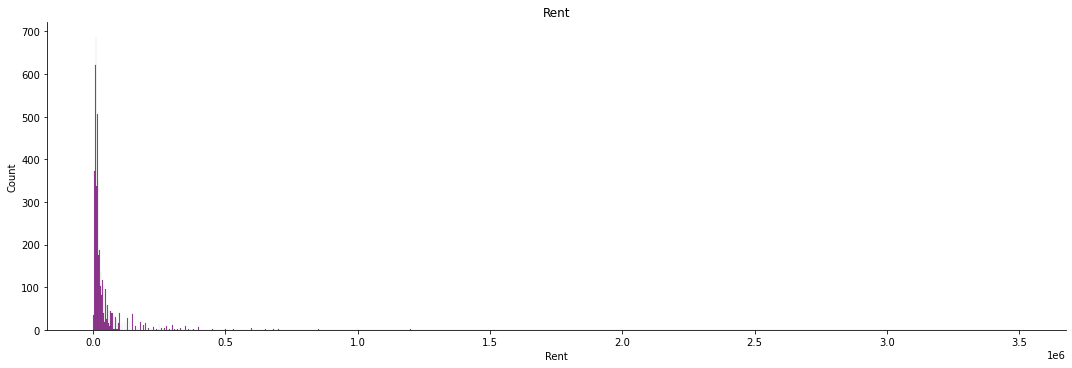

In [6]:
print('Maximum rent', df['Rent'].max())
plt.figure(figsize = (20,5)) 
sns.displot(df['Rent'], color = 'purple', aspect= 3)
plt.title('Rent')
plt.show()


> Outliers present in the target variable

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


(4746, 12)
(4587, 12)
Maximum rent 3500000


<Figure size 1440x360 with 0 Axes>

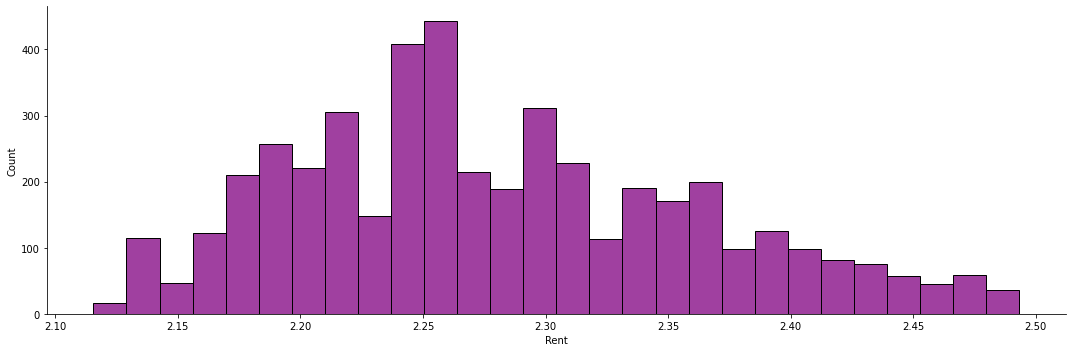

In [7]:
# Removing Outlier using percentiles
upper = df['Rent'].quantile(0.97)
lower = df['Rent'].quantile(0.01) #No need as its skewd data

df_clean = df[(df['Rent'] <= upper) & (df['Rent'] >= lower)]
df_clean['Rent'] = np.log(df['Rent'])
# df = df_clean
print(df.shape)
print(df_clean.shape)

print('Maximum rent', df['Rent'].max())
plt.figure(figsize = (20,5)) 
sns.displot(np.log(df_clean['Rent']), color = 'purple', aspect= 3)
plt.show()

> After outlier removal and log transformtion Rent Now have a normal distribution

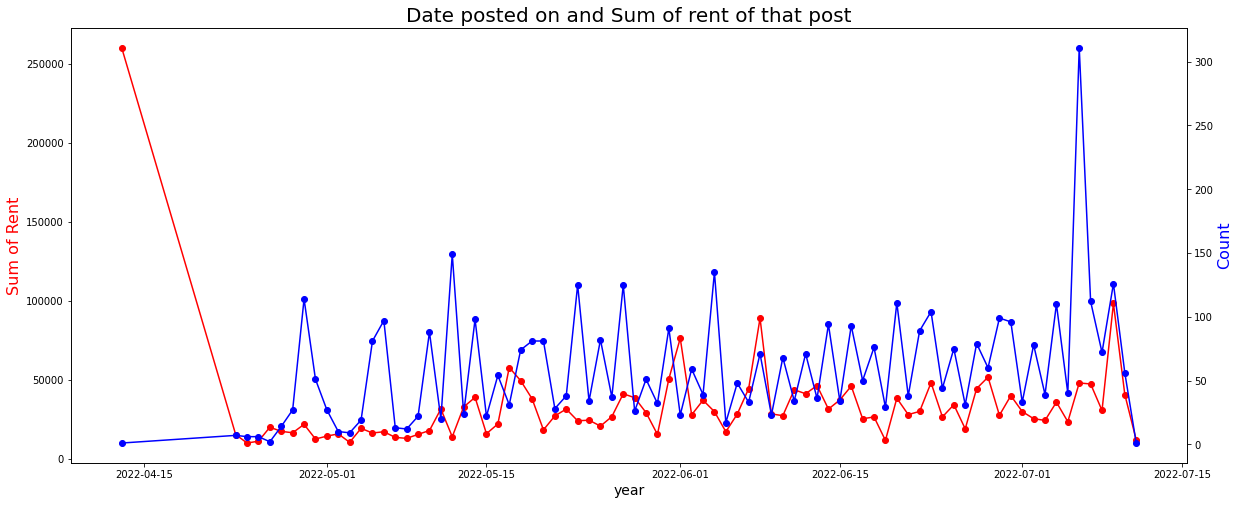

In [8]:
# Dual Axis

df2 = df[['Posted On', "Rent"]]
df_date = df2.groupby('Posted On').mean()

df2 = df[['Posted On', "Rent"]]
df_date1 = df2.groupby('Posted On').count().rename(columns = {'Rent': 'Count'})

fig,ax = plt.subplots(figsize =(20,8))
ax.plot(df_date['Rent'],
        color="red", 
        marker="o")

ax.set_xlabel("year", fontsize = 14)

ax.set_ylabel("Sum of Rent",
              color="red",
              fontsize=16)
              

ax2 = ax.twinx()

ax2.plot(df_date1['Count'],color="blue",marker="o")
ax2.set_ylabel("Count",color="blue",fontsize=16)
ax.set_title('Date posted on and Sum of rent of that post', fontsize = 20)            
# ax.set_xticks(ticks = df['Posted On'], rotation = 90)
# ax2.set_xticks(ticks = df['Posted On'], rotation = 90)
plt.show()

> Posted On date show that it have effect on the Rent as on specific days 

> Outliers have been removed

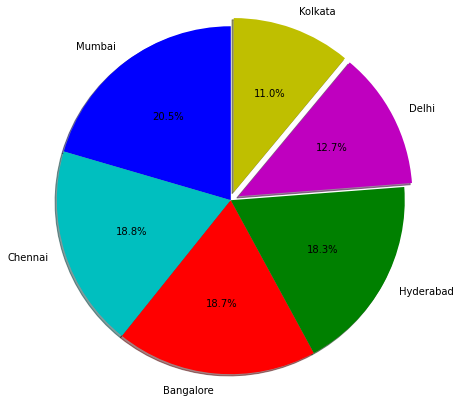

In [9]:
#pie chart
labels = ['Mumbai', 'Chennai', 'Bangalore', 'Hyderabad', 'Delhi', 'Kolkata']
colour = ['b', 'c', 'r', 'g', 'm', 'y']
explode = [0,0,0,0,0.1,0.1]
plt.pie(df['City'].value_counts(), labels = labels, autopct='%1.1f%%',
       radius = 2, shadow=True, startangle=90, explode = explode,
   colors = colour)

plt.show()

> The Distribution of the data according to different city is good.

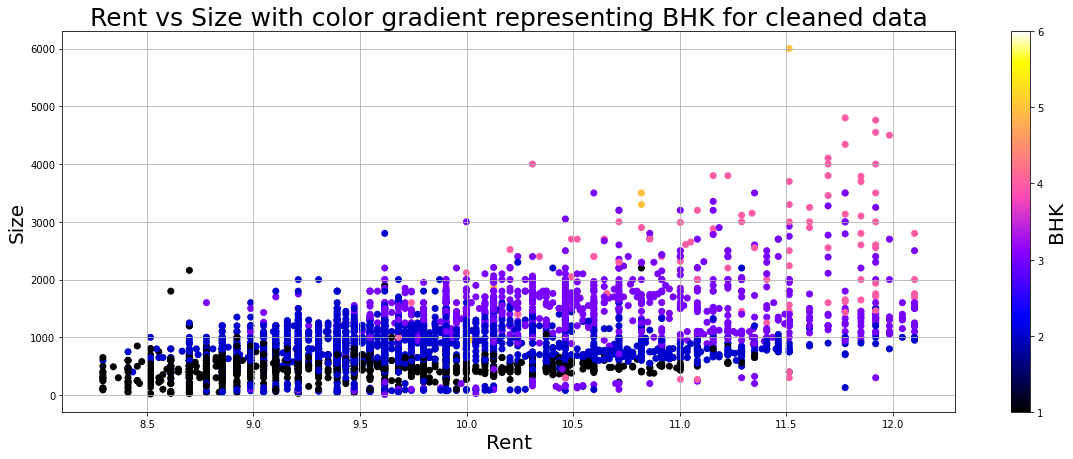

In [10]:
# Scatter Plot
plt.figure(figsize=(20,7))
plt.scatter(df_clean['Rent'], df_clean['Size'],c = df_clean['BHK'], cmap = 'gnuplot2')
plt.title('Rent vs Size with color gradient representing BHK for cleaned data',fontsize=25)
plt.xlabel('Rent', fontsize=20)
plt.ylabel('Size', fontsize=20)
plt.grid(True)
cb= plt.colorbar()
cb.set_label('BHK', fontsize=20)
plt.show()

> As the Rent and Size increases the BHk also increases.

In [11]:
df['Area Locality'].value_counts()

Bandra West                                37
Gachibowli                                 29
Electronic City                            24
Velachery                                  22
Miyapur, NH 9                              22
                                           ..
Kengeri Upanagara                           1
Ittamadu, Banashankari, Outer Ring Road     1
Rmv Extension, Armane Nagar                 1
snv la                                      1
Manikonda, Hyderabad                        1
Name: Area Locality, Length: 2235, dtype: int64

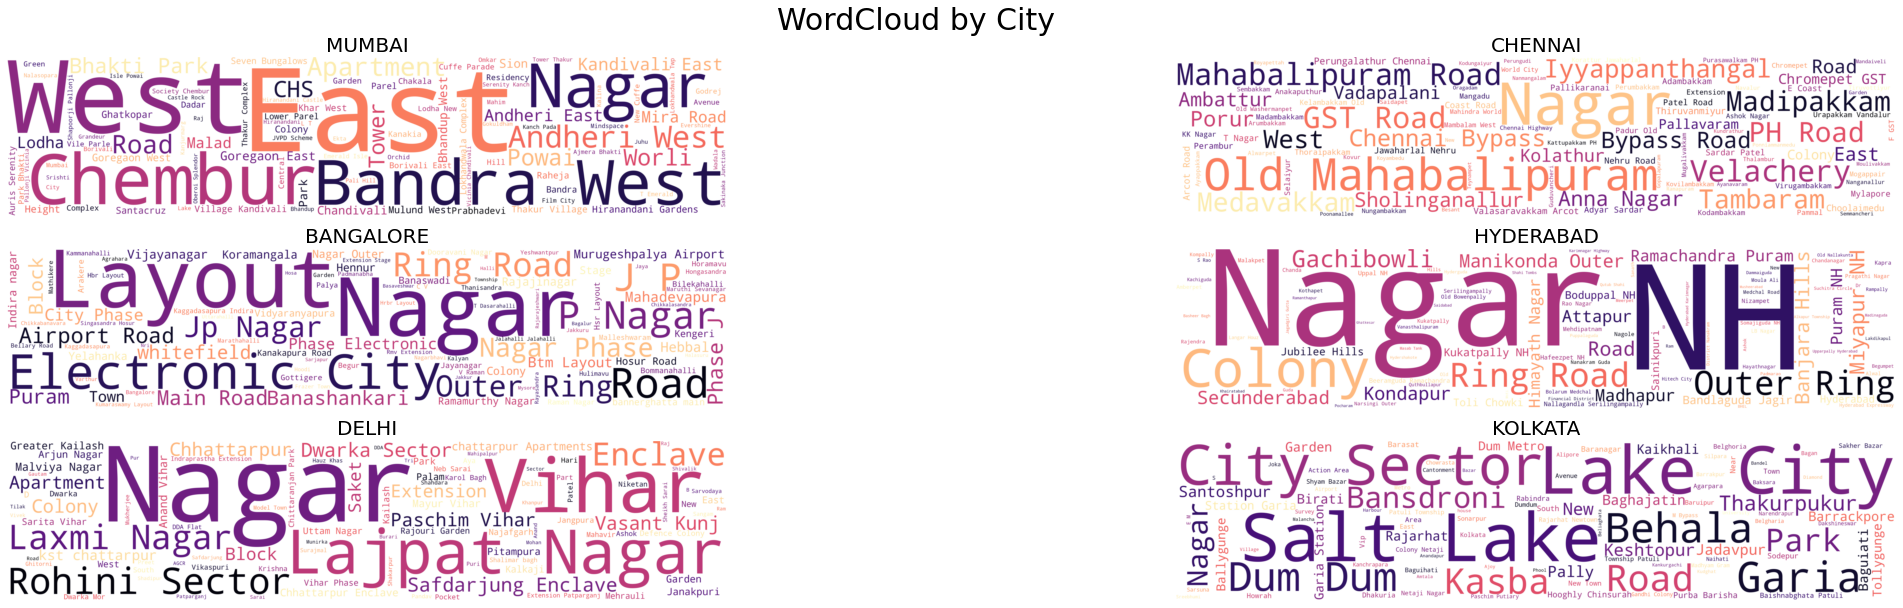

In [12]:
# WordCLoud
l = ['Mumbai', 'Chennai', 'Bangalore', 'Hyderabad', 'Delhi', 'Kolkata']
plt.figure(figsize=(40,10))
plt.subplots_adjust(hspace=0.2, wspace = 0.1)
plt.suptitle("WordCloud by City", fontsize=30, y=0.95)



# for i in l:
for idx, val in enumerate(l):
    # add a new subplot iteratively
    ax = plt.subplot(3, 2, idx + 1)
    df1 = df.loc[df['City'] == val]
    
    text = " ".join(area for area in df1["Area Locality"])
    wordcloud = WordCloud(background_color="white", 
                      max_words=100,
                      width=4500, 
                      height=1000,
                      colormap="magma" ).generate(text)

    
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.set_title(val.upper(), fontsize = 20)
    ax.axis("off")

> We can see the differnt locations best for puttong on rent based on Different city. 

# Data Preprocessing

In [13]:
# Extracting week day feature from the Posted On feature
df_clean['day name'] = df_clean['Posted On'].dt.day_name()

y = df_clean['Rent']
x = df_clean.drop(['Rent', 'Posted On'], axis = 1)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [14]:
# splitting Numerical and categorical features
x_num = x.select_dtypes(include = 'number')
x_cat = x.select_dtypes(exclude = 'number')

In [15]:
print(df_clean.shape)
print(x_num.shape)
print(x_cat.shape)

(4587, 13)
(4587, 3)
(4587, 8)


# Numerical Feature Selection

<AxesSubplot:>

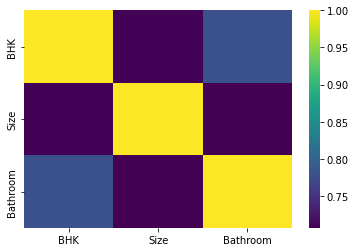

In [16]:
sns.heatmap(x_num.corr(), cmap = 'viridis')

> The features are highly correlated with each other. But no need to drop as we the feature importance for these feature.

# categorical Feature selection

In [17]:
x_cat.head()

,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Point of Contact,day name
0,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,Contact Owner,Wednesday
1,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,Contact Owner,Friday
2,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,Contact Owner,Monday
3,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,Contact Owner,Monday
4,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,Contact Owner,Monday


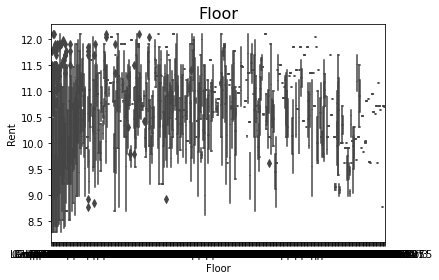

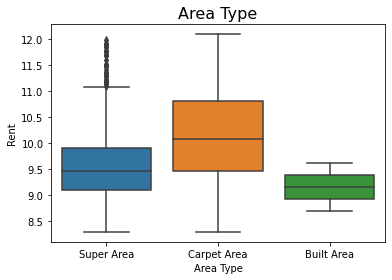

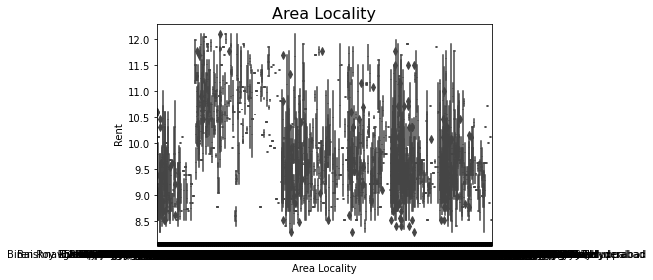

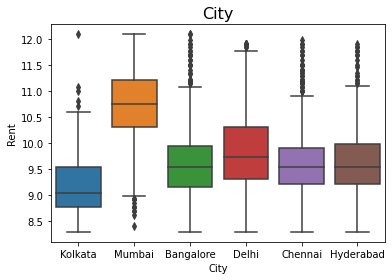

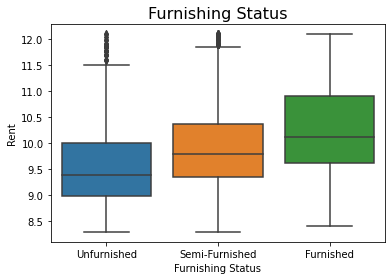

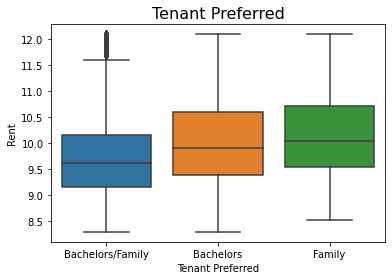

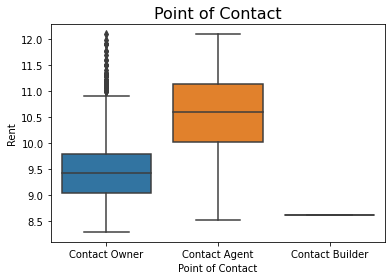

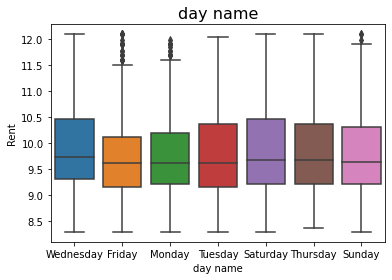

In [18]:
x_cat_all = pd.concat([x_cat, y], axis  = 1, join = 'inner')

for idx, val in enumerate(x_cat.columns):
    sns.boxplot(x = val, y = 'Rent', data  = x_cat_all)
    plt.title(val, fontsize = 16)
    plt.show()


>We can see the relation between feature variables and target variable. We can drop featues which don't show any any effect on target variable

In [19]:
#droping Some Features
x_cat1 = x_cat.drop(['Floor', 'Area Locality'], axis = 1)

In [20]:
x_cat_dum = pd.get_dummies(x_cat1)
x_cat_dum.shape

(4587, 25)

In [21]:
# Creating Master Feature

x_all = pd.concat([x_num, x_cat_dum], axis =1, join = 'inner')

# Model Selection

In [22]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x_all, y, random_state= 42)

In [23]:
# So We can say we have somewhat similar distribution
print(ytrain.mean())
print(ytest.mean())

9.813184339736315
9.832473457466907


In [24]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
xtrain = sc.fit_transform(xtrain)
xtest = sc.transform(xtest)

In [25]:
from sklearn.linear_model import LinearRegression
lr  = LinearRegression()
lr.fit(xtrain,ytrain)
lr.score(xtest, ytest)
y_pred_lr = lr.predict(xtest)
print('MAE', mean_absolute_error(ytest, y_pred_lr))
print('MSE', mean_squared_error(ytest, y_pred_lr))
print('r2_score', lr.score(xtest, ytest))

MAE 0.2729682933852668
MSE 0.12297271449312182
r2_score 0.8110285538472652


In [26]:
from sklearn.linear_model import Ridge
rig  = Ridge()
rig.fit(xtrain,ytrain)
rig.score(xtest, ytest)
y_pred_rig = rig.predict(xtest)
print('MAE', mean_absolute_error(ytest, y_pred_rig))
print('MSE', mean_squared_error(ytest, y_pred_rig))
print('r2_score', rig.score(xtest, ytest))

MAE 0.2728309644653889
MSE 0.12296722896721775
r2_score 0.8110369834226168


In [27]:
from sklearn.tree import DecisionTreeRegressor
dtree = DecisionTreeRegressor()
dtree.fit(xtrain,ytrain)
Y_pred_dtree = dtree.predict(xtest)
print('f1 score for dtree : ', dtree.score(xtest,ytest))

f1 score for dtree :  0.6518443436794379


In [28]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(xtrain,ytrain)
rfr.score(xtest, ytest)

0.8051381976399035

In [29]:

from sklearn.svm import SVR
svr = SVR(kernel='linear')
svr.fit(xtrain,ytrain)
y_pred_svr = svr.predict(xtest)
print('MAE', mean_absolute_error(ytest, y_pred_svr))
print('MSE', mean_squared_error(ytest, y_pred_svr))
print('r2 score for svr : ', svr.score(xtest,ytest))

MAE 0.2735920911543954
MSE 0.12374854987754724
r2 score for svr :  0.8098363321810554


In [30]:
from xgboost import XGBRegressor
xgb = XGBRegressor()
xgb.fit(xtrain,ytrain)
y_pred_xgb = xgb.predict(xtest)
print('MAE', mean_absolute_error(ytest, y_pred_xgb))
print('MSE', mean_squared_error(ytest, y_pred_xgb))
print('r2_score', xgb.score(xtest, ytest))


MAE 0.2808864560426098
MSE 0.12784502609043724
r2_score 0.8035413013096062


##### Now the best model we get is Ridge Regression 

# Hyperparameter Tunning using Optuna


In [31]:
import optuna
from sklearn.model_selection import cross_val_score
def objective(trial):
#     n_estimators = trial.suggest_int('n_estimators', 2, 20)
    alpha = int(trial.suggest_float('alpha', 1, 50, log=True))
    
    clf = Ridge(alpha=alpha)
    
    return cross_val_score(
        clf, xtrain, ytrain, n_jobs=-1, cv=5).mean()

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

trial = study.best_trial

print('Accuracy: {}'.format(trial.value))
print("Best hyperparameters: {}".format(trial.params))

[I 2022-08-20 10:34:06,710] A new study created in memory with name: no-name-d73aea1f-f097-4ad3-a47e-966f0a9a1952
[I 2022-08-20 10:34:08,393] Trial 0 finished with value: 0.7759229347997214 and parameters: {'alpha': 2.6371852110105944}. Best is trial 0 with value: 0.7759229347997214.
[I 2022-08-20 10:34:08,432] Trial 1 finished with value: 0.7759308399919491 and parameters: {'alpha': 6.259601215700572}. Best is trial 1 with value: 0.7759308399919491.
[I 2022-08-20 10:34:08,471] Trial 2 finished with value: 0.7759453697974076 and parameters: {'alpha': 29.44250950598393}. Best is trial 2 with value: 0.7759453697974076.
[I 2022-08-20 10:34:08,510] Trial 3 finished with value: 0.7759453697974076 and parameters: {'alpha': 29.252901683462614}. Best is trial 2 with value: 0.7759453697974076.
[I 2022-08-20 10:34:08,549] Trial 4 finished with value: 0.7759265050610648 and parameters: {'alpha': 45.60574581286842}. Best is trial 2 with value: 0.7759453697974076.
[I 2022-08-20 10:34:08,588] Trial 

Accuracy: 0.7759465318921702
Best hyperparameters: {'alpha': 24.589316954488844}


In [32]:
rig1  = Ridge(alpha = 24.173473461462148)
rig1.fit(xtrain,ytrain)
rig1.score(xtest, ytest)
y_pred_rig1 = rig1.predict(xtest)
print('MAE', mean_absolute_error(ytest, y_pred_rig1))
print('MSE', mean_squared_error(ytest, y_pred_rig1))
print('r2_score', rig1.score(xtest, ytest))

MAE 0.27278973133163337
MSE 0.12295240220103144
r2_score 0.8110597676268977


In [33]:
r = rig.score(xtest, ytest)
r1 = rig1.score(xtest, ytest)
print(f'''The r2_score of rige regression is {r} and the r2_score of hypertunned ridge regression is {r1}. 
      So the total incrementation in r2_score after hyperparameter tunning is {r1-r}''')

The r2_score of rige regression is 0.8110369834226168 and the r2_score of hypertunned ridge regression is 0.8110597676268977. 
      So the total incrementation in r2_score after hyperparameter tunning is 2.2784204280923426e-05
